<a href="https://colab.research.google.com/github/Vey27/Applied-Data-Science/blob/main/yahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

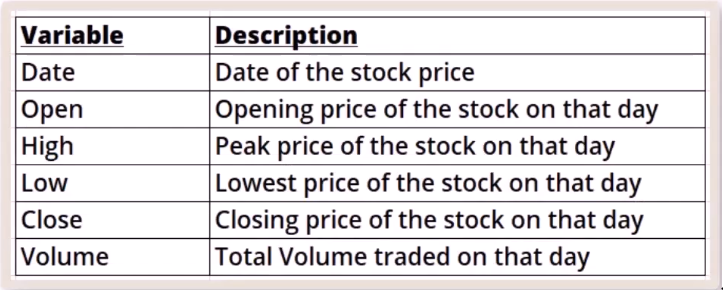

The 50-day moving average (DMA) and 200-day moving average (DMA) are commonly used technical indicators in the stock market. They are calculated by averaging the closing prices of a stock or index over a specific number of trading days.

Both the 50 DMA and 200 DMA are used by technical analysts and traders to analyze stock price movements, identify potential trends, and make informed trading decisions.

In [ ]:
#import libriaries
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
google = yahooFinance.Ticker('GOOG')


In [ ]:
# 5 years of data
df = google.history('5Y')

In [ ]:
import pandas as pd

df.index = df.index.date
print(df)


                  Open        High         Low       Close    Volume  \
2018-05-21   53.702999   54.400002   53.682499   53.979000  20464000   
2018-05-22   54.178001   54.329498   53.334499   53.486500  21800000   
2018-05-23   53.256500   54.039001   53.085499   53.984501  21214000   
2018-05-24   53.950001   54.023499   53.307499   53.962002  15336000   
2018-05-25   53.951000   54.127998   53.688751   53.783001  17988000   
...                ...         ...         ...         ...       ...   
2023-05-15  116.489998  118.794998  116.480003  116.959999  22107900   
2023-05-16  116.830002  121.199997  116.830002  120.089996  32370100   
2023-05-17  120.180000  122.279999  119.459999  121.480003  26659600   
2023-05-18  121.559998  123.900002  121.489998  123.519997  27014500   
2023-05-19  124.199997  126.478996  122.720001  123.250000  30251300   

            Dividends  Stock Splits  
2018-05-21        0.0           0.0  
2018-05-22        0.0           0.0  
2018-05-23        0.0

In [ ]:
#print the head of the data
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2018-05-21,53.702999,54.400002,53.682499,53.979000,20464000,0.0,0.0
2018-05-22,54.178001,54.329498,53.334499,53.486500,21800000,0.0,0.0
2018-05-23,53.256500,54.039001,53.085499,53.984501,21214000,0.0,0.0
2018-05-24,53.950001,54.023499,53.307499,53.962002,15336000,0.0,0.0
2018-05-25,53.951000,54.127998,53.688751,53.783001,17988000,0.0,0.0


In [ ]:
df.shape

(1259, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000
mean,89.477463,90.523705,88.525656,89.545523,3.042049e+07,0.0,0.015886
std,30.165963,30.472604,29.835928,30.144895,1.318977e+07,0.0,0.563660
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000
25%,60.423752,61.106251,60.126799,60.570749,2.195440e+07,0.0,0.000000
50%,86.720001,87.755501,85.886002,86.769997,2.714000e+07,0.0,0.000000
75%,113.803501,115.404926,112.745098,114.215500,3.435700e+07,0.0,0.000000
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000


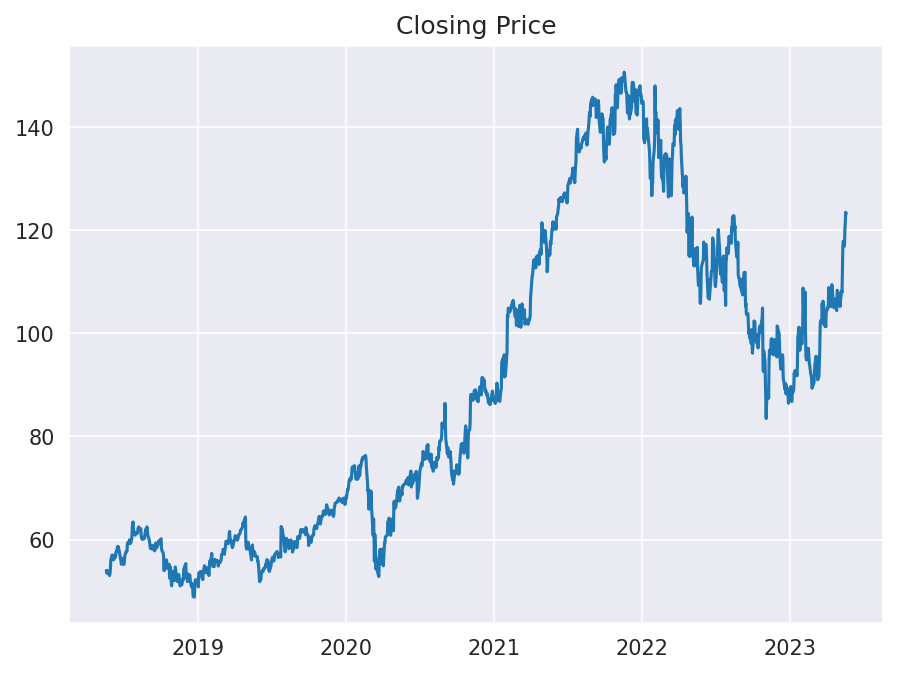

In [ ]:
#overview of closing price before calculating DMAs
sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('Closing Price')
plt.plot(df['Close'])

In [ ]:
#Calculate 50DMA
df['fiftyDMA'] = df['Close'].rolling(50).mean()

In [ ]:
#Calcuate 200DMA
df['thDMA'] = df['Close'].rolling(200).mean()

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,thDMA
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000,1210.000000,1060.000000
mean,89.477463,90.523705,88.525656,89.545523,3.042049e+07,0.0,0.015886,89.808262,91.537838
std,30.165963,30.472604,29.835928,30.144895,1.318977e+07,0.0,0.563660,29.879811,29.235387
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000,52.442220,55.768365
25%,60.423752,61.106251,60.126799,60.570749,2.195440e+07,0.0,0.000000,60.383197,63.294708
50%,86.720001,87.755501,85.886002,86.769997,2.714000e+07,0.0,0.000000,85.651659,87.300487
75%,113.803501,115.404926,112.745098,114.215500,3.435700e+07,0.0,0.000000,113.750300,118.879604
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,139.273730


In [ ]:
#Don't see any valid rows in dividends and stock splits,it will be remove
df.drop(columns = ['Dividends','Stock Splits'], inplace = True)
df.head() # the first 20, first 50 and 200 would be because its calculating the moving average

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
2018-05-21,53.702999,54.400002,53.682499,53.979000,20464000,NaN,NaN
2018-05-22,54.178001,54.329498,53.334499,53.486500,21800000,NaN,NaN
2018-05-23,53.256500,54.039001,53.085499,53.984501,21214000,NaN,NaN
2018-05-24,53.950001,54.023499,53.307499,53.962002,15336000,NaN,NaN
2018-05-25,53.951000,54.127998,53.688751,53.783001,17988000,NaN,NaN


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
2023-05-15,116.489998,118.794998,116.480003,116.959999,22107900,104.4421,101.138525
2023-05-16,116.830002,121.199997,116.830002,120.089996,32370100,104.9323,101.155775
2023-05-17,120.180000,122.279999,119.459999,121.480003,26659600,105.4785,101.185775
2023-05-18,121.559998,123.900002,121.489998,123.519997,27014500,106.0559,101.223875
2023-05-19,124.199997,126.478996,122.720001,123.250000,30251300,106.6677,101.246225


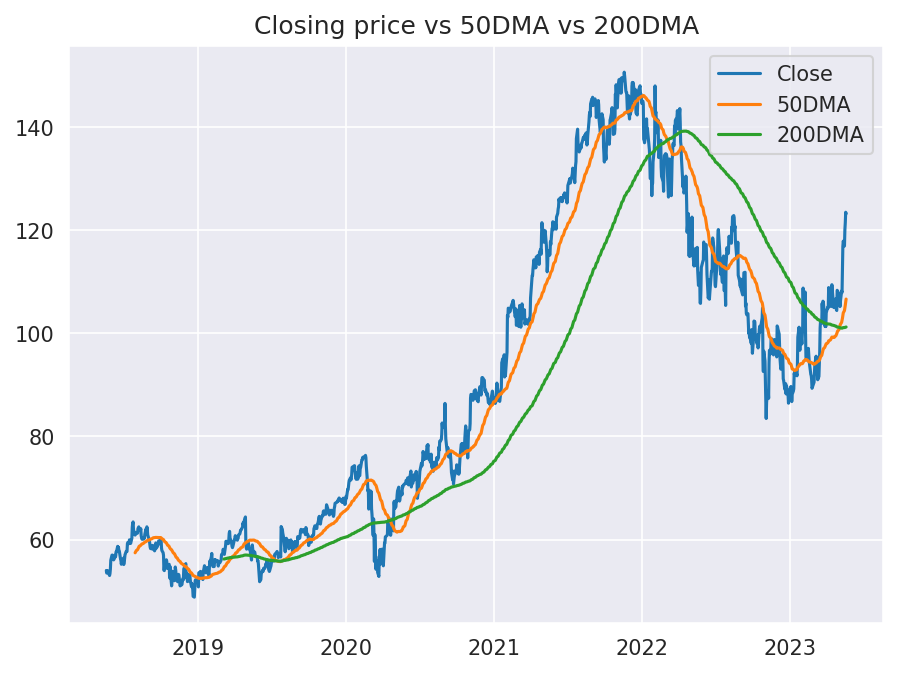

In [ ]:
#plot closing price vs 50DMA vs 200DMA
sns.set_style('darkgrid')
plt.figure(figsize=(7,5), dpi = 150)
plt.title('Closing price vs 50DMA vs 200DMA')
plt.plot(df['Close'], label= 'Close')
plt.plot(df['fiftyDMA'], label = '50DMA')
plt.plot(df['thDMA'], label = '200DMA')
plt.legend()
plt.savefig('closing_50_200DMA_plot.png')


### Inferences from the above graph.
1. 50DMA and 200DMA are fairly good indicators of how the stock is moving
2. If the closing price is above the 50DMA or 200DMA, it is usually on the uptrend or bullish.
3. If the closing price is below the 50DMA or 200DMA, it usually means that it is in a down trend. 
4. Every point where 50DMA and 200DA intersect, the market usually reverses its trend(High-> Low|Low->High)
5. The huge dip at the March 2020, indicates the Covid 19 market crash. 

# Finding the possible futuristic movement of the stock

<Axes: >

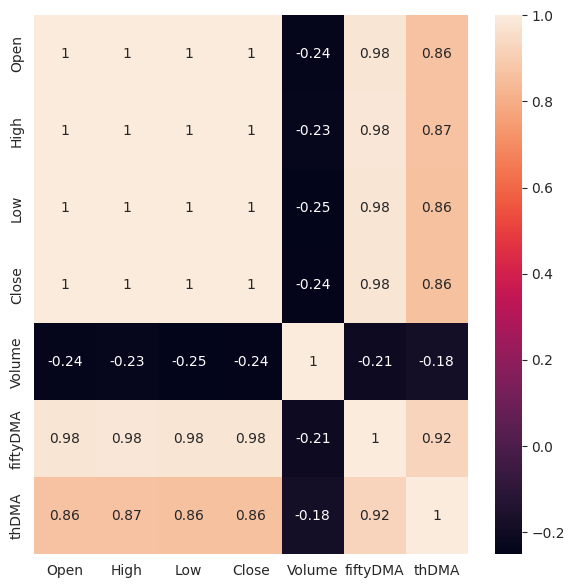

In [ ]:
plt.figure(figsize=(7,7),dpi = 100)
sns.heatmap(df.corr(),annot = True)

#From the heatmap analysis, the following inferences can be made:

1. The closing price shows a significant positive correlation with most of the variables, indicating a strong relationship. However, it doesn't exhibit a strong correlation with the volume variable.
2. The heatmap also reveals the presence of high multi-collinearity among the variables, indicating that some of the independent variables are highly correlated with each other.


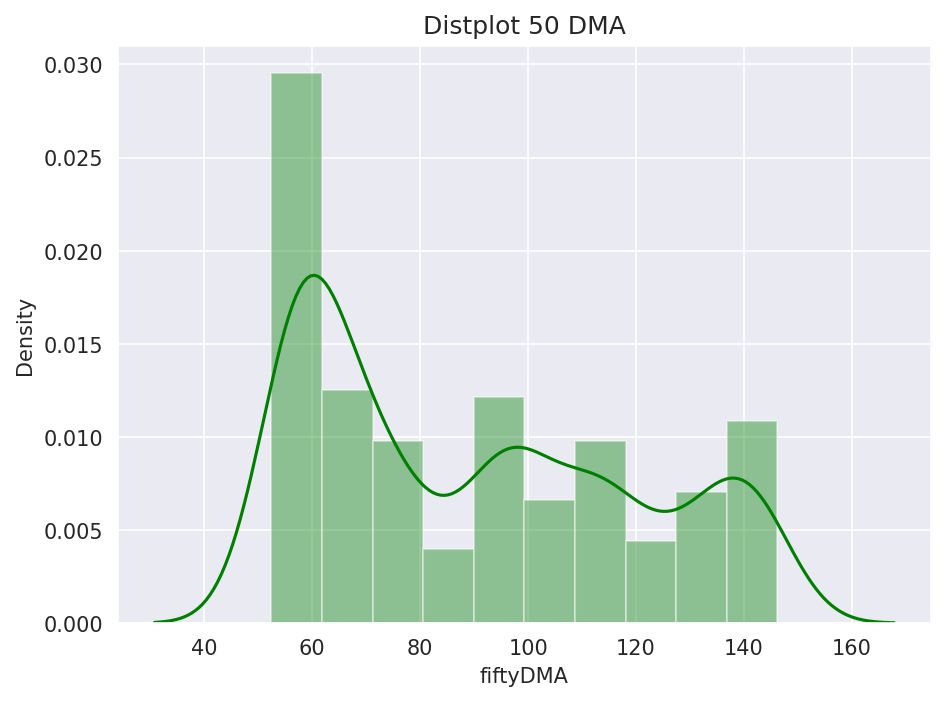

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5), dpi=150)
plt.title('Distplot 50 DMA')
sns.distplot(df['fiftyDMA'], color='green')  
plt.show()


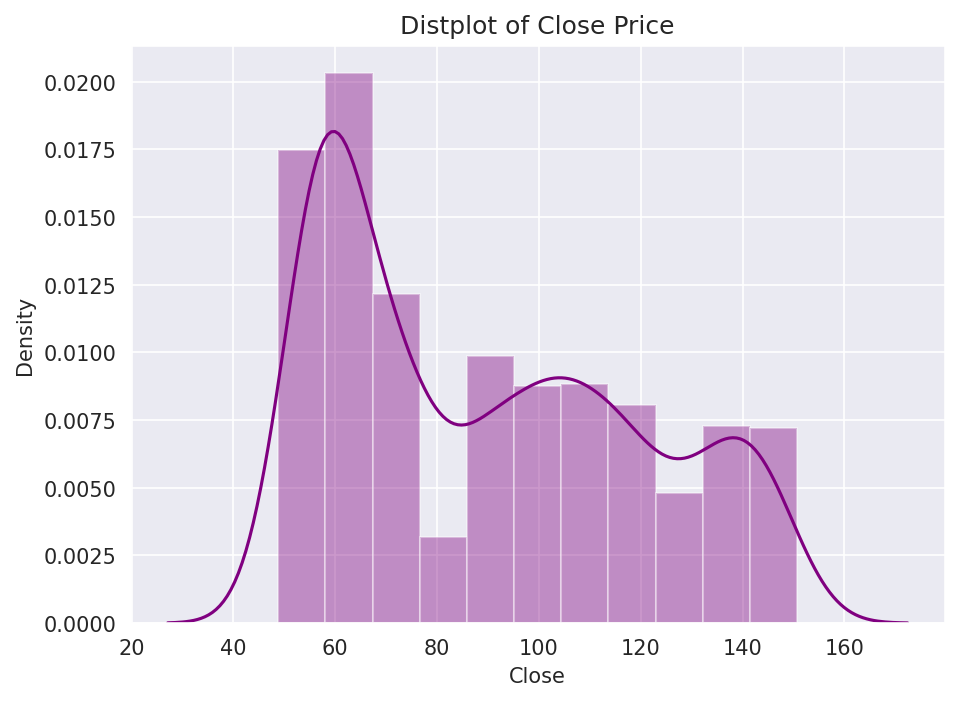

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5), dpi=150)
plt.title('Distplot of Close Price')
sns.distplot(df['Close'], color='purple')  
plt.show()

The inference from this we can see that 50 DMA and closing price they seem to be following the same distribution.
Is there a possibility of a severe economic downturn resembling the Great Depression, given that these variables seem to exhibit similar distribution patterns?

#Fit Model

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols(formula = 'Close ~ fiftyDMA', data =df)
model = model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 2.773e+04
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        00:46:49   Log-Likelihood:                -3911.4
No. Observations:                1210   AIC:                             7827.
Df Residuals:                    1208   BIC:                             7837.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5036      0.559      4.478      0.000       1.407       3.601
fiftyDMA       0.9837      0.006    166.518      0.000       0.972       0.995
==============================================================================
Omnibus:                       57.829   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.541
Skew:                          -0.535   Prob(JB):                     5.86e-15
Kurtosis:                       3.393   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Inferences from the summary
1. The model demonstrates good performance based on R-squared scores 0.958 and coefficient of determination.
2. However, caution should be exercised due to the high correlation among the variables, as it can lead to multicollinearity issues and complicate the interpretation of individual parameter effects.

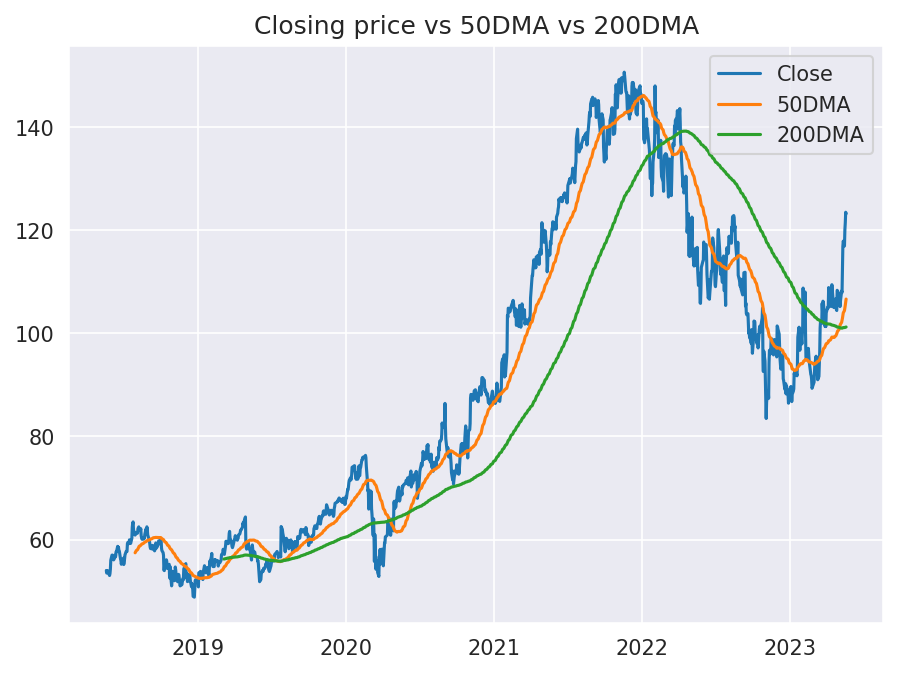

In [ ]:
#plot closing price
sns.set_style('darkgrid')
plt.figure(figsize=(7,5), dpi = 150)
plt.title('Closing price vs 50DMA vs 200DMA')
plt.plot(df['Close'], label= 'Close')
plt.plot(df['fiftyDMA'], label = '50DMA')
plt.plot(df['thDMA'], label = '200DMA')
plt.legend()
plt.savefig('closing_50_200DMA_plot.png')


Observing the graph, take note of the closing prices on May 19th, 2023 for both the 50-day moving average (DMA) and 200-day moving average (DMA). It is evident that the price is slightly trending upward, but with a notable resistance, indicating that a steep upward surge is unlikely. To provide further context, I have included the real GDP graph below for your review and comparison with the Yahoo Finance analysis.

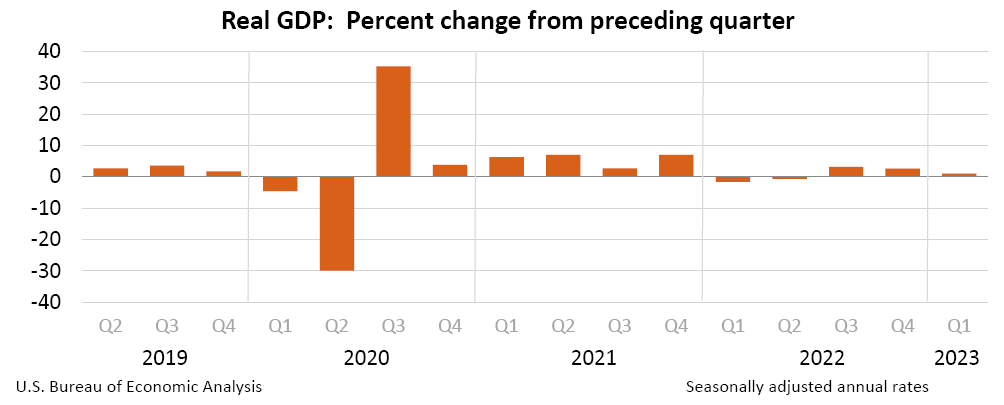

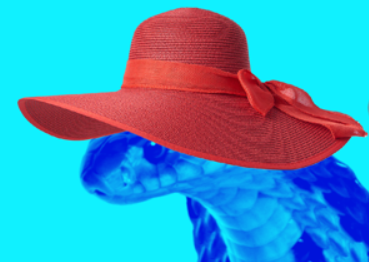